# Medidas de riesgo

<img style="float: right; margin: 0px 0px 15px 15px;" src="http://www.thebluediamondgallery.com/wooden-tile/images/risk.jpg" width="450px" height="150px" />

> Existen $10^{11}$ estrellas en la galaxia. Ese solía ser un número grandísimo. Sin embargo son solo cien billones. Es menos que la deuda nacional! (de EUA) Solíamos llamarlos números astronómicos. Ahora, deberíamos llamarlos números económicos.

**Richard Feynman**

Referencias:
- www.risklab.es/es/seminarios/pasados/septiembre2005.pdf
- www.emagister.com/uploads_user_home/Comunidad_Emagister_5840_valor.pdf
- repositorio.uchile.cl/bitstream/handle/2250/127411/149%20Medidas_de_Riesgo_Financiero_Rafael_Romero_M.pdf

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
from datetime import datetime
import scipy.stats as stats
import scipy as sp
import scipy.optimize as scopt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#algunas opciones para Python
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
def get_historical_closes(ticker, start_date, end_date=None):
    closes = web.DataReader(name=ticker, data_source='yahoo', start=start_date, end=end_date).sort_index('major_axis')
    return closes.loc['Adj Close',:]

In [3]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

## 0. Introducción y apuntes históricos

Existen en el mundo factores fundamentales que han contribuido al desarrollo de la gestión, medición, y el control del riesgo financiero:

- Alto nivel de inestabilidad económica en los mercados.
 - Fundamentalmente la volatilidad se ve reflejada, en los siguientes factores: La volatilidad de los mercados accionarios, la volatilidad de la tasa de cambio, la volatilidad de la tasa de interés y la volatilidad de los precios en el mercado de los commodities.

- Crecimiento de las actividades de negociación. 
 - Durante los últimos años, tanto el número de activos negociados como el volumen de éstos, ha tenido un incremento considerable a nivel mundial. Se ha evolucionado considerablemente en el desarrollo de numerosos tipos de instrumentos, los cuales han facilitado las transacciones sobre activos previamente ilíquidos. Los mercados de derivados financieros como las opciones, futuros, forwards y swaps, han tenido un crecimiento notable a partir de los años 70, cuando hubo un importante desarrollo de sus aspectos teóricos, liderado por autores como Robert Merton, Fisher Black, Myron Scholes.

- Avances en la tecnología.
 - Mejor poder computacional, mejores técnicas computacionales. Se ha avanzado en la cultura de la información, ya que las empresas han comenzado a tomar conciencia acerca de la importancia de tener bases de datos, esenciales para un posterior análisis del riesgo. Estos avances tecnológicos permiten obtener, de forma rápida, información fundamental para la toma de decisiones de inversión.
___

### Conceptos básicos relativos al riesgo

- Etimológicamente la palabra riesgo deriva del italiano risico o rischio, y éste a la vez del árabe risq, que significa ”lo que depara la providencia”. 

- La palabra riesgo puede entenderse como la contingencia o proximidad a un daño; es decir, tiene que ver con el futuro, con la necesidad de prever y anticiparnos antes de cierta contingencia.

- En el contexto de las finanzas, cuando hablamos de riesgo nos estamos refiriendo a la posibilidad de pérdida o ganancia debido a los cambios sobre los factores que afectan el valor de un activo. Por esa razón, es importante que se identifiquen, se midan, se controlen, y se haga un monitoreo de los diversos tipos de riesgo a los que están expuestos los inversores en los mercados de capitales.

- Por lo general, el riesgo se percibe como una exposición a eventos negativos; no obstante, el riesgo bien manejado representa una gran oportunidad de obtener rentabilidades significativas en los portafolios financieros. En este sentido, y con una visión positiva, el riesgo financiero es más considerado como una “oportunidad de ganar” que como una “posibilidad de perder”.
___

### Apuntes históricos

Históricamente se pueden identificar tres periodos relevantes en cuanto al desarrollo de las finanzas modernas:

1. **Modelo de media-varianza (Markowitz, 1952-1956)**
 - Antes de esto el riesgo financiero era considerado como un *factor de corrección* entre el retorno esperado de una inversión y el retorno real. De modo que no se podía definir el "riesgo" sino hasta que se tenía el resultado de la decisión de inversión. Markowitz propuso como medidas de riesgo la varianza (para inversiones individuales) y la covarianza (para portafolios). Con esta forma de medir el riesgo se pudo optimizar...

2. **Modelos en tiempo continuo (Merton, Black, Scholes, 1969-1973)**
 - Estos modelos fueron un gran paso teórico que se evidenciaron prácticamente con la introducción de los instrumentos derivados, puesto que permitieron su valuación.
 
3. **Medidas de riesgo (Artzner, 1997-1999)**
 - Desarrollos que pretenden modelar situaciones más reales como sesgo, colas anchas, etcétera.

___
Supongamos que tenemos un portafolio de acciones. ¿Qué tan riesgosa es esa inversión?

**Objetivo:** producir un único numero para resumir la exposición de la inversión al riesgo de mercado.

- Pregunta inicial: ¿Cuánto podría perder en el peor escenario?
- Mala pregunta: lo podrías perder todo.

Bueno, pero

- ¿Cuál es la pérdida que estamos $100\alpha \%$ confiados que no excederemos en $T$ tiempo?

Ejemplo:

$VaR_{0.9}=1000.000$ en 10 días:
- Estoy 90% seguro que no perderé más de $1000.000$ en mi inversión en los siguientes 10 días.
- Hay un 90% de probabilidad que mi pérdida sea menor a $1000.000$ en los siguientes 10 días.
- Hay un 10% de probabilidad que mi pérdida sea mayor a $1000.000$ en los siguientes 10 días.

## 1. Value-at-Risk (VaR)

Dado un horizonte temporal $T$ y un nivel de confianza $100 \alpha \%$, el **VaR** es la pérdida máxima respecto al rendimiento esperado sobre el horizonte temporal $T$ que sólo es superada con una probabilidad $1 − \alpha$.


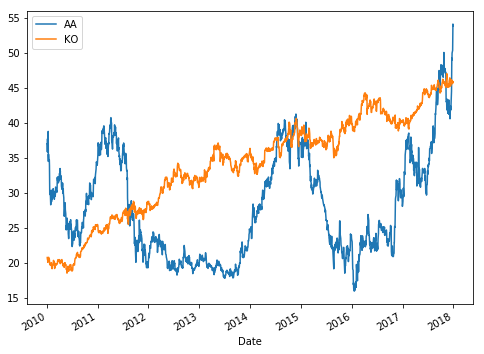

In [6]:
ticker = ['AA','KO']
start_date = '2010-01-01'
end_date = '2017-12-31'
closes = get_historical_closes(ticker, start_date, end_date)
closes.plot(figsize=(8,6));

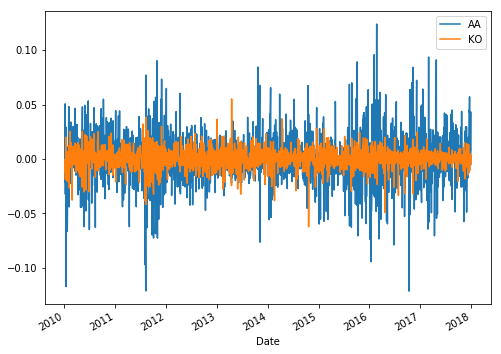

In [7]:
daily_ret = calc_daily_ret(closes)
daily_ret.plot(figsize=(8,6));

Definimos un portafolio con las anteriores acciones

In [10]:
def def_portfolio(tickers, participation=None):
    if (participation is None):
        participation = np.ones(len(tickers))/len(tickers)    
    portfolio = pd.DataFrame({'Tickers': tickers, 'Participation': participation}, index=tickers)
    return portfolio

In [11]:
portfolio = def_portfolio(ticker)
portfolio

,Participation,Tickers
AA,0.5,AA
KO,0.5,KO


Rendimientos anuales

In [13]:
def calc_annual_ret(daily_ret):
    return np.exp(daily_ret.groupby(lambda date: date.year).sum())-1

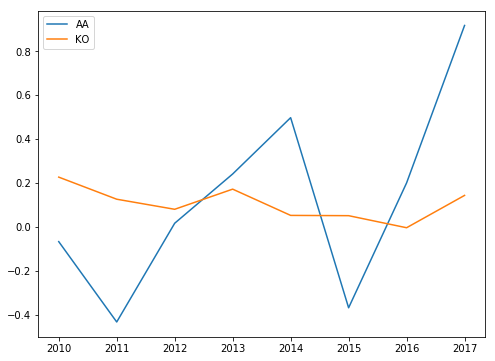

In [42]:
annual_ret = calc_annual_ret(daily_ret)
annual_ret.plot(figsize=(8,6));

Rendimientos mensuales

In [ ]:
def calc_monthly_ret(daily_ret):
    return np.exp(daily_ret.groupby(lambda date: '%4d-%02d'%(date.year,date.month)).sum())-1

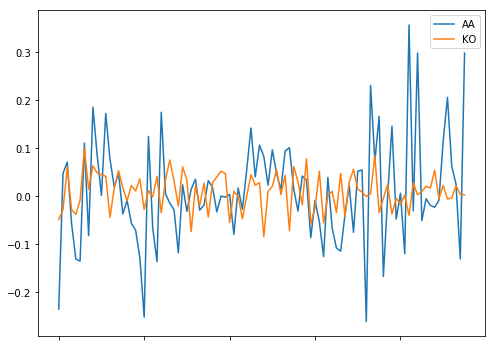

In [43]:
monthly_ret = calc_monthly_ret(daily_ret)
monthly_ret.plot(figsize=(8,6));

Calculamos el rendimiento esperado

In [44]:
def calc_portfolio_ret(portfolio, returns, name='Value'):
    total_sum = portfolio.Participation.sum()
    weight = portfolio.Participation/total_sum
    weighted_ret = returns*weight
    return pd.DataFrame({name: weighted_ret.sum(axis=1)})

In [45]:
portfolio_ret = calc_portfolio_ret(portfolio, monthly_ret)
portfolio_ret

,Value
2010-01,-0.142
2010-02,0.009
2010-03,0.066
2010-04,-0.043
2010-05,-0.085
...,...
2017-08,0.100
2017-09,0.029
2017-10,0.023
2017-11,-0.064


### Métodos para estimar el VaR

In [46]:
freq, values = np.histogram(monthly_ret, bins=30)
freq = freq.astype('float32')
prob = freq/np.sum(freq)

In [47]:
daily_ret.quantile(0.01)

AA   -0.063
KO   -0.026
Name: 0.01, dtype: float64